<h1 style="color:#D81B60; text-align:center;"> Netflix EDA Project </h1>

## 1. Import Libraries

#### (a) Import different libraries used.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

## 2. Load Dataset

#### (a) Loading a CSV file.

In [122]:
df = pd.read_csv("../data/netflix_titles.csv")

## 3. Basic Information


#### (a) Identify missing values. (See which columns have null data)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
 12  genre         8807 non-null   object
dtypes: int64(1), object(12)
memory usage: 894.6+ KB


#### (b) Evaluate the complete statistical summary of all columns, including both numeric and categorical data.

In [111]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
count,8807,8807,8807,8807,8807,8807,8807,8807.000000,8807,8804,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1767,NaN,17,220,514,8775,36
top,s1,Movie,Dick Johnson Is Dead,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",Dramas
freq,1,6131,1,2634,825,2818,119,NaN,3211,1793,362,4,1600
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN


#### (c) Find how many missing (null) values each column has in the given dataset.

In [113]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
genre           0
dtype: int64

#### (d) Finds the number of duplicate rows present in the entire dataset.

In [114]:
df.duplicated().sum()

np.int64(0)

## 4. Data Cleaning

#### (a) Removing Duplicates

In [116]:
df.drop_duplicates(inplace=True)

#### (b) Handling missing values

In [123]:
df['director'] = df['director'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

## 5. Univariate Analysis

#### (a) Content Type Distribution

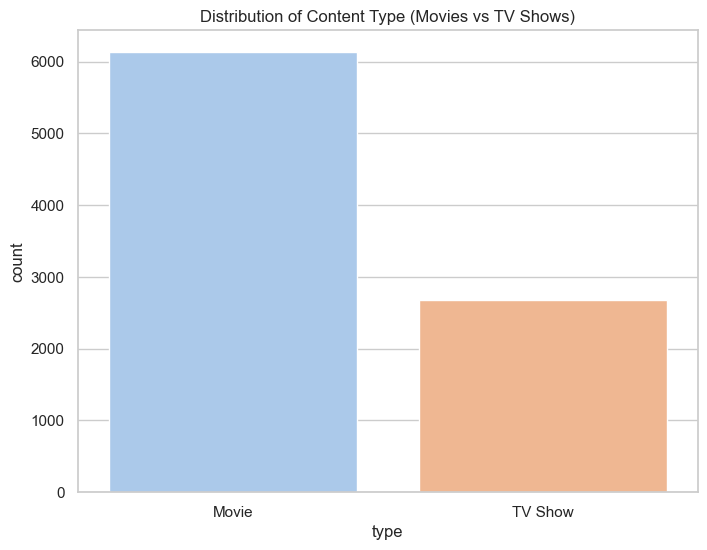

In [124]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)
plt.title("Distribution of Content Type (Movies vs TV Shows)")

plt.savefig("../images/distribution_type.png")

plt.show()

#### (b) Top 10 Countries Producing Netflix Content

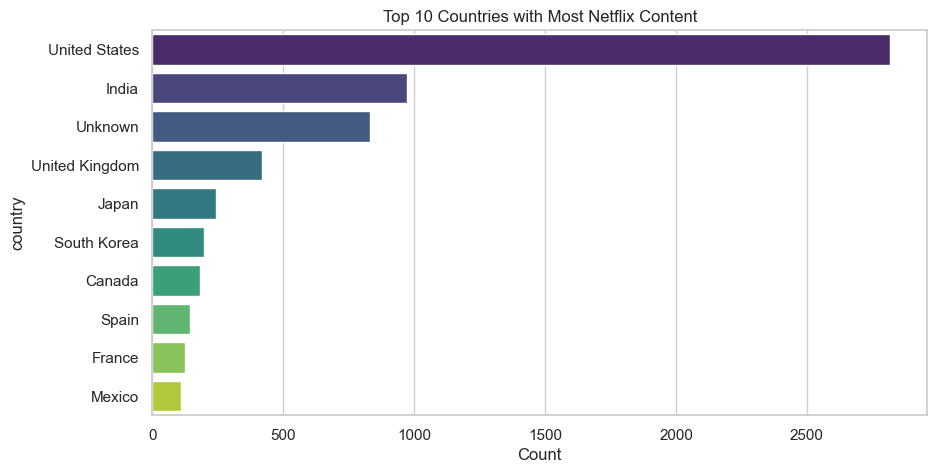

In [125]:
country_series = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_series.values, y=country_series.index, hue=country_series.index, palette='viridis', legend=False)
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Count")

plt.savefig("../images/country_counts.png")

plt.show()

#### (c) Rating Distribution

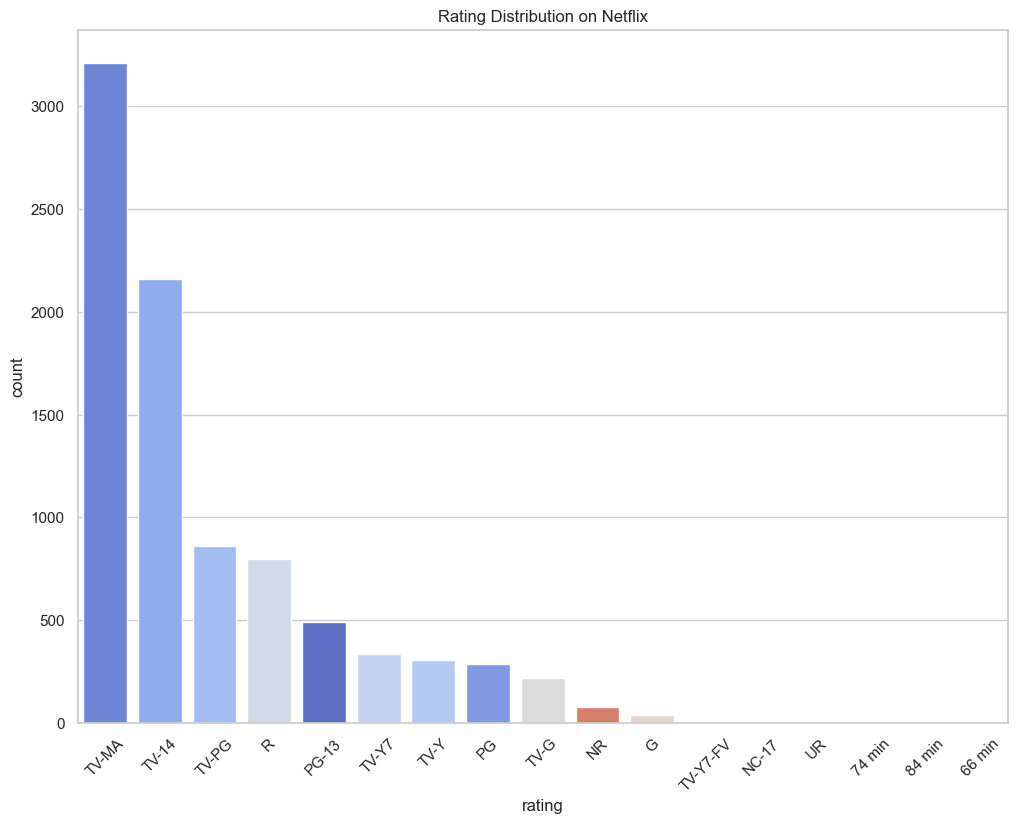

In [98]:
plt.figure(figsize=(12,9))
sns.countplot(data=df, x='rating', hue='rating', order=df['rating'].value_counts().index, palette="coolwarm", legend=False)
plt.title("Rating Distribution on Netflix")
plt.xticks(rotation=45)

plt.savefig("../images/ratings_bar.png")

plt.show()

## 6. Bivariate Analysis

#### (a) Movies vs TV shows over the years.

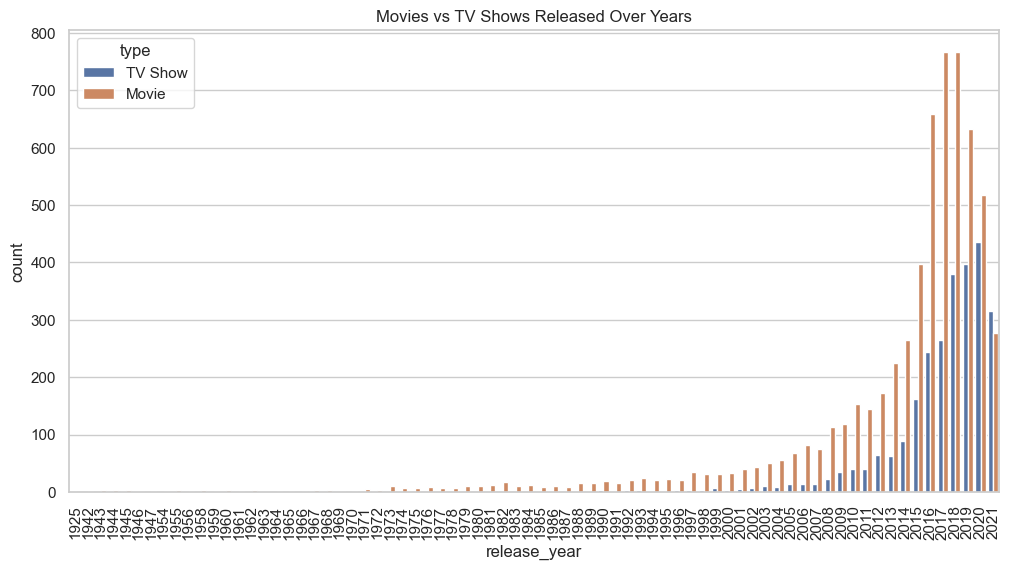

In [100]:
df['release_year'] = df['release_year'].astype(int)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', hue='type')
plt.title("Movies vs TV Shows Released Over Years")
plt.xticks(rotation=90)
plt.savefig("../images/Movies_TV shows_released.png")

plt.show()

#### (b) Most common Genres.

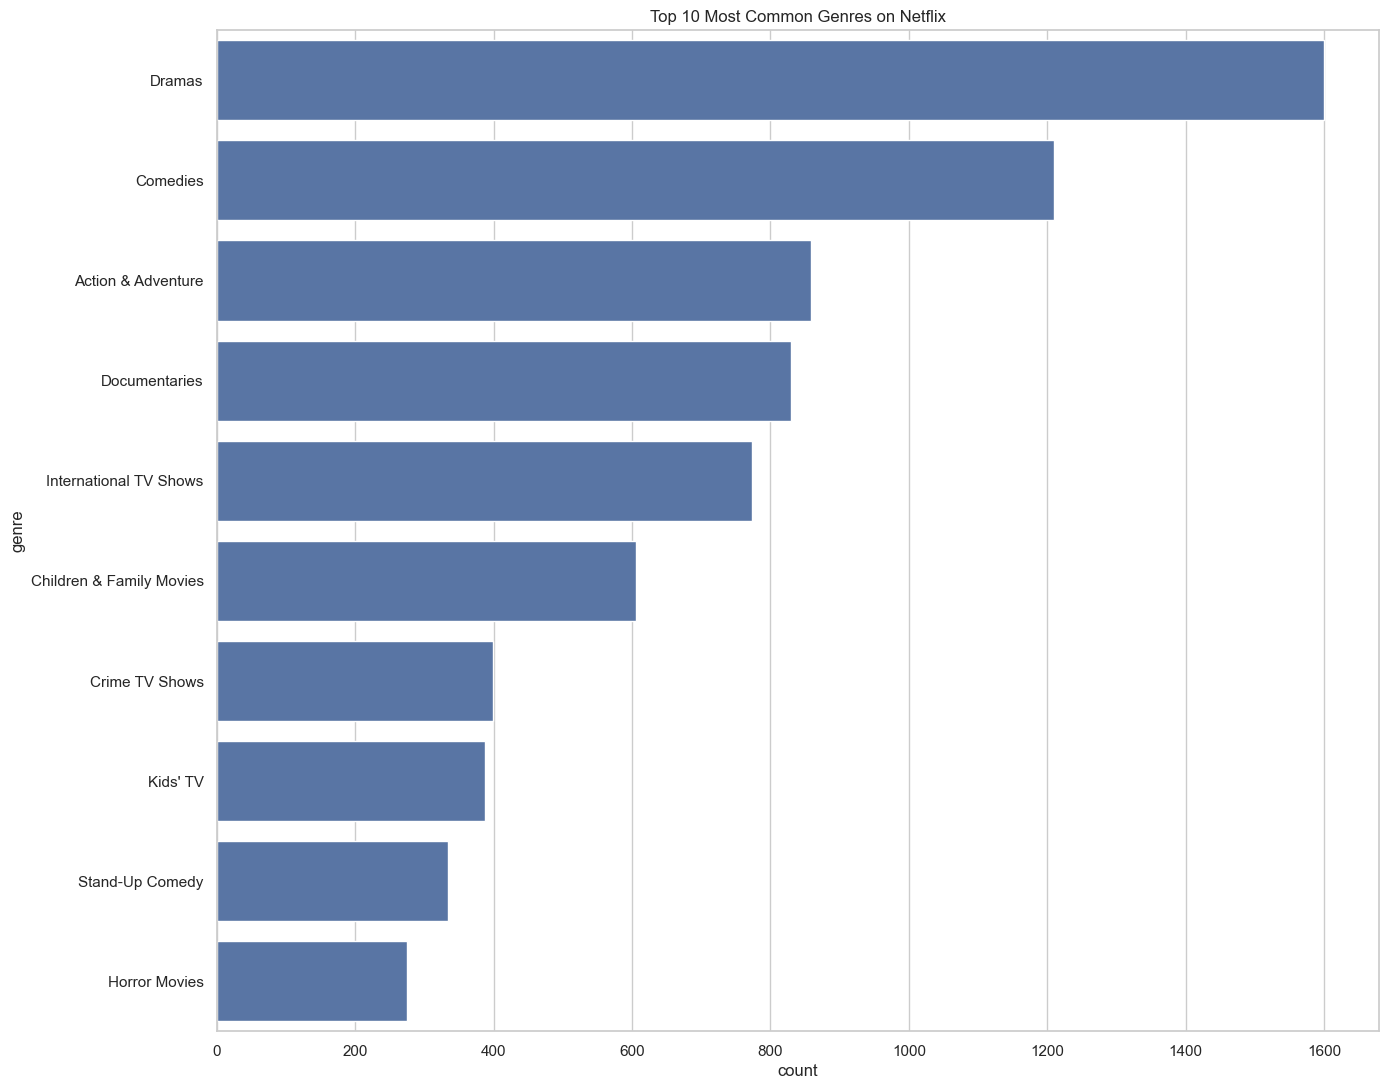

In [110]:
df['genre'] = df['listed_in'].apply(lambda x: x.split(",")[0])

plt.figure(figsize=(15,13))
sns.countplot(data=df, y='genre', order=df['genre'].value_counts().head(10).index)
plt.title("Top 10 Most Common Genres on Netflix")

plt.savefig("../images/10_most_common_Genres_Netflix.png")

plt.show()

## 7. Insights Summary

In [103]:
print("Key Insights:")
print("1. Netflix has more Movies than TV Shows.")
print("2. The USA and India produce the most content on Netflix.")
print("3. The most common rating is TV-MA (adult audience).")
print("4. Drama and International Movies are the most common genres.")
print("5. Netflix content peaked in the mid-2010s.")

Key Insights:
1. Netflix has more Movies than TV Shows.
2. The USA and India produce the most content on Netflix.
3. The most common rating is TV-MA (adult audience).
4. Drama and International Movies are the most common genres.
5. Netflix content peaked in the mid-2010s.
